# Class_Practices_Md Ruhul Amin(Tanis)_201939060046


predict the house price with Size and Bedrooms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Cost Function
![](img/cost.png)

In [2]:
# cost function 
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T)-Y, 2)
    return np.sum(inner) / (2 * len(X))

## Gradient Descent
![](img/gradient.png)

In [3]:
# gradient descent
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X * theta.T - Y
        
        for j in range(parameters):    
            term = np.multiply(error, X[:, j])
            temp[0, j] = temp[0, j] - alpha / len(X) * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X, Y, theta)
        
    return theta, cost
    

In [4]:
# path = 'ex1data2.txt'
# data = pd.read_csv('../input/size-bedrooms-price/Size_Bedrooms_Price.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
# data.head()

data = pd.read_csv('Datasets/Size_Bedrooms_Price.txt', header= None, names=['Size', 'Bedrooms', 'Price'])

In [6]:
# calculate means 、stds、mins、maxs
means = data.mean().values
stds = data.std().values
mins = data.min().values
maxs = data.max().values
data_ = data.values
data.describe()

,Size,Bedrooms,Price
count,48.000000,48.00000,48.000000
mean,1986.187500,3.18750,338481.145833
std,792.588988,0.76231,124424.246794
min,852.000000,1.00000,169900.000000
25%,1424.250000,3.00000,249350.000000
50%,1870.000000,3.00000,299900.000000
75%,2253.500000,4.00000,376725.000000
max,4478.000000,5.00000,699900.000000


## z-score normalization
$\mu$ is mean , $\sigma$ is standard deviation

![](img/zScore.jpeg)

In [7]:
# Feature Scaling  with z-score
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.148643,-0.245963,0.493624
1,-0.487248,-0.245963,-0.068967
2,0.522102,-0.245963,0.245281
3,-0.719399,-1.557765,-0.855791
4,1.279115,1.065839,1.618807


In [8]:
# add ones column
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.148643,-0.245963,0.493624
1,1,-0.487248,-0.245963,-0.068967
2,1,0.522102,-0.245963,0.245281
3,1,-0.719399,-1.557765,-0.855791
4,1,1.279115,1.065839,1.618807


In [9]:
# set X(tarining data) and Y(target varible)
cols = data.shape[1]
X = data.iloc[:, :cols-1]
Y = data.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0, 0, 0]))

# perform linear regression on the data set
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, Y, theta, alpha, iters)

# get the cost of the model
computeCost(X, Y, g)



0.12932099766072366

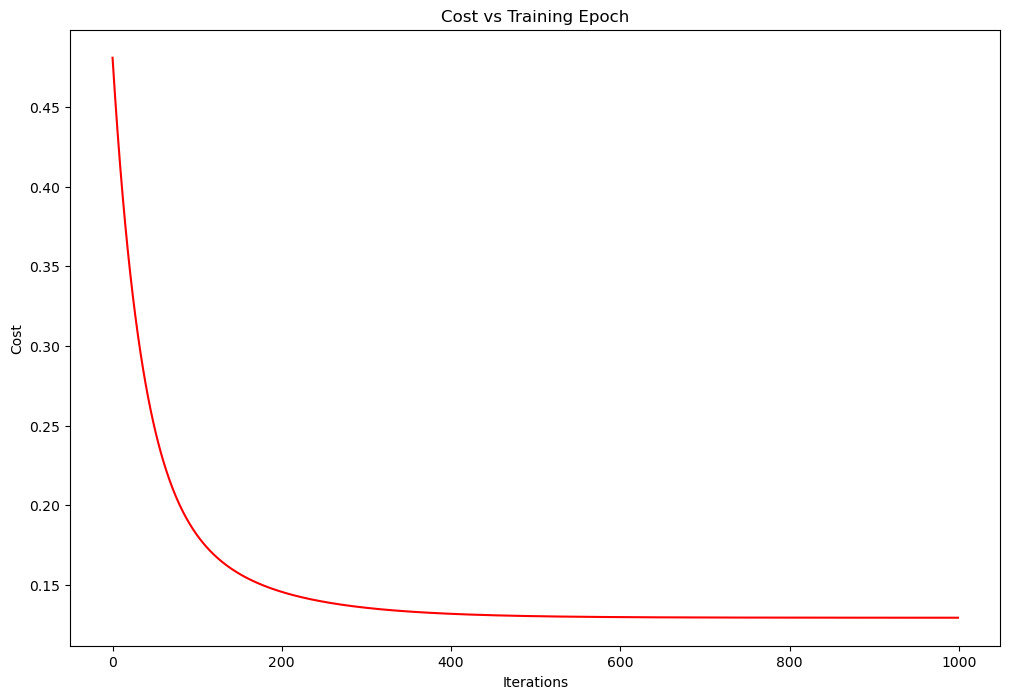

In [10]:
# image of cost
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Training Epoch')
plt.show()

In [11]:
# convert parameters to the range before scaling
def theta_transform(theta, means, stds):
    temp = means[:-1] * theta[1:] / stds[:-1]
    theta[0] = (theta[0] - np.sum(temp)) * stds[-1] + means[-1]
    theta[1:] = theta[1:] *stds[-1] / stds[:-1]
    return theta.reshape(1, -1)

In [12]:
g_ = np.array(g.reshape(-1,1))
means = means.reshape(-1,1)
stds = stds.reshape(-1,1)
transfoem_g = theta_transform(g_,means, stds)
transfoem_g

array([[87945.20976589,   137.89037562, -7322.4170559 ]])

In [13]:
# predict house price
def predictPrice(x, y, theta):
    return theta[0,0]+ theta[0,1] * x + theta[0,2]*y

price = predictPrice(2104, 3, transfoem_g)
price

356099.30890942545

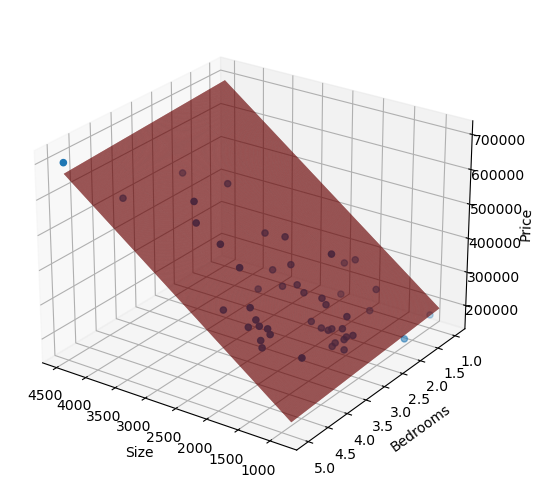

In [14]:
# fit image
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

X_ = np.arange(mins[0],maxs[0]+1, 1)
Y_ = np.arange(mins[1],maxs[1]+1, 1)
X_, Y_ = np.meshgrid(X_,Y_)
Z_ = transfoem_g[0,0]+ transfoem_g[0,1] * X_ + transfoem_g[0,2] * Y_

ax.view_init(elev=25, azim=125)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

ax.plot_surface(X_, Y_, Z_, rstride=1, cstride=1, color='red')
ax.scatter(data_[:,0], data_[:,1], data_[:,2])
plt.show()



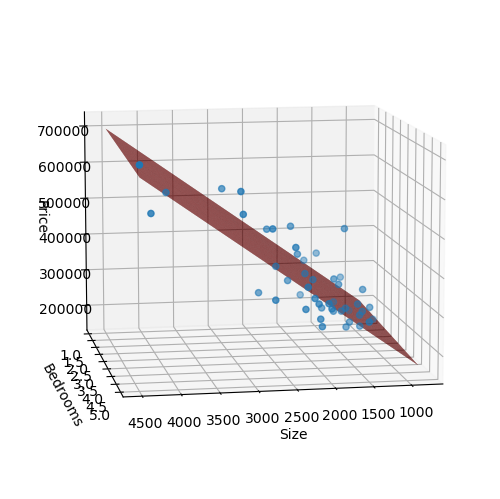

In [15]:
# fit image (another angle)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)

X_ = np.arange(mins[0],maxs[0]+1, 1)
Y_ = np.arange(mins[1],maxs[1]+1, 1)
X_, Y_ = np.meshgrid(X_,Y_)
Z_ = transfoem_g[0,0]+ transfoem_g[0,1] * X_ + transfoem_g[0,2] * Y_

ax.view_init(elev=10, azim=80)

ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

ax.plot_surface(X_, Y_, Z_, rstride=1, cstride=1, color='red')
ax.scatter(data_[:,0], data_[:,1], data_[:,2])
plt.show()
